In [1]:
import numpy as np
import pandas as pd
import sklearn.model_selection 

In [108]:
#%ls "../processed_data/train_full.csv"

train_df = pd.read_csv("../processed_data/train_full.csv")

train_df.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,1,60,rl,65,8450,pave,nothing,reg,lvl,allpub,inside,gtl,collgcr,norm,norm,1fam,2story,7,5,2003,2003,gable,compshg,vinylsd,vinylsd,brkface,196,gd,ta,pconc,gd,ta,no,glq,706,unf,0,150,856,gasa,ex,y,sbrkr,856,854,0,1710,1,0,2,1,3,1,gd,8,typ,0,nothing,attchd,2003,rfn,2,548,ta,ta,y,0,61,0,0,0,0,nothing,nothing,nothing,0,2,2008,wd,normal,208500
1,2,2,20,rl,80,9600,pave,nothing,reg,lvl,allpub,fr2,gtl,veenker,feedr,norm,1fam,1story,6,8,1976,1976,gable,compshg,metalsd,metalsd,nothing,0,ta,ta,cblock,gd,ta,gd,alq,978,unf,0,284,1262,gasa,ex,y,sbrkr,1262,0,0,1262,0,1,2,0,3,1,ta,6,typ,1,ta,attchd,1976,rfn,2,460,ta,ta,y,298,0,0,0,0,0,nothing,nothing,nothing,0,5,2007,wd,normal,181500
2,3,3,60,rl,68,11250,pave,nothing,ir1,lvl,allpub,inside,gtl,collgcr,norm,norm,1fam,2story,7,5,2001,2002,gable,compshg,vinylsd,vinylsd,brkface,162,gd,ta,pconc,gd,ta,mn,glq,486,unf,0,434,920,gasa,ex,y,sbrkr,920,866,0,1786,1,0,2,1,3,1,gd,6,typ,1,ta,attchd,2001,rfn,2,608,ta,ta,y,0,42,0,0,0,0,nothing,nothing,nothing,0,9,2008,wd,normal,223500
3,4,4,70,rl,60,9550,pave,nothing,ir1,lvl,allpub,corner,gtl,crawfor,norm,norm,1fam,2story,7,5,1915,1970,gable,compshg,wd sdng,wd shng,nothing,0,ta,ta,brktil,ta,gd,no,alq,216,unf,0,540,756,gasa,gd,y,sbrkr,961,756,0,1717,1,0,1,0,3,1,gd,7,typ,1,gd,detchd,1998,unf,3,642,ta,ta,y,0,35,272,0,0,0,nothing,nothing,nothing,0,2,2006,wd,abnorml,140000
4,5,5,60,rl,84,14260,pave,nothing,ir1,lvl,allpub,fr2,gtl,noridge,norm,norm,1fam,2story,8,5,2000,2000,gable,compshg,vinylsd,vinylsd,brkface,350,gd,ta,pconc,gd,ta,av,glq,655,unf,0,490,1145,gasa,ex,y,sbrkr,1145,1053,0,2198,1,0,2,1,4,1,gd,9,typ,1,ta,attchd,2000,rfn,3,836,ta,ta,y,192,84,0,0,0,0,nothing,nothing,nothing,0,12,2008,wd,normal,250000


In [129]:
sum(train_df.isnull().sum() > 0)

0

In [111]:
train_df = df.drop(['Unnamed: 0', 'Id'], axis=1)

In [58]:
pd.set_option('display.max_columns',100)
train_df.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,rl,65,8450,pave,nothing,reg,lvl,allpub,inside,gtl,collgcr,norm,norm,1fam,2story,7,5,2003,2003,gable,compshg,vinylsd,vinylsd,brkface,196,gd,ta,pconc,gd,ta,no,glq,706,unf,0,150,856,gasa,ex,y,sbrkr,856,854,0,1710,1,0,2,1,3,1,gd,8,typ,0,nothing,attchd,2003,rfn,2,548,ta,ta,y,0,61,0,0,0,0,nothing,nothing,nothing,0,2,2008,wd,normal,208500


In [112]:
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


[]

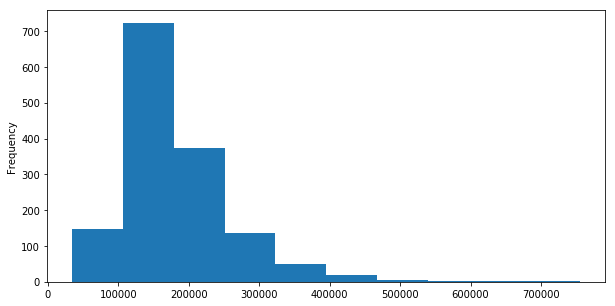

In [105]:
train_df['SalePrice'].plot(kind='hist',figsize=(10,5)).plot()

[]

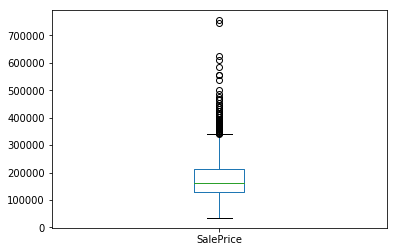

In [106]:
train_df['SalePrice'].plot(kind='box').plot()

In [107]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [116]:
print(train_df.shape)
outlier_mask = train_df['SalePrice'] > (214000 - 129975) * 1.5
train_df[outlier_mask].shape

(1460, 80)


(1142, 80)

In [ ]:
import math

math.exp

In [ ]:
from math import log
from math import exp

[]

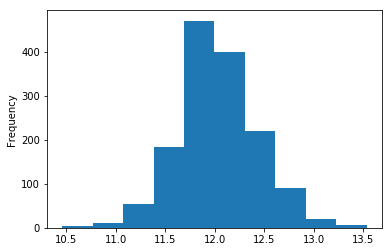

In [95]:

train_df['SalePrice'].map(lambda x: log(x)).plot(kind = 'hist').plot()

In [119]:
train_df['LogSalePrice'] = train_df['SalePrice'].map(lambda x: log(x))

In [94]:
#train_df.head(1)

train_df[['SalePrice','LogSalePrice']].head()

,SalePrice,LogSalePrice
0,208500,12.247694
1,181500,12.109011
2,223500,12.317167
3,140000,11.849398
4,250000,12.429216


In [121]:
train_df['LogSalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: LogSalePrice, dtype: float64

In [123]:
print(train_df.shape)
outlier_mask = train_df['LogSalePrice'] > (12.273731 - 11.775097) * 1.5
train_df[outlier_mask].shape

(1460, 81)


(1460, 81)

[]

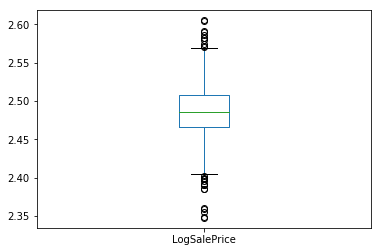

In [126]:
train_df['LogSalePrice'].map(lambda x: log(x)).plot(kind = 'box').plot()

In [149]:
#[column for column in train_df.columns.tolist() if column not in ['YearBuilt']]

In [166]:
corr = train_df.corr()
#corr2 = train_df.loc[:,[column for column in train_df.columns.tolist() if column not in \
  #                  ['YearBuilt','OverallQual','TotRmsAbvGrd','GarageCars']]].corr() 
#pd.set_option('display.max_rows',1100)
corr2.head()

,MSSubClass,LotFrontage,LotArea,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LogSalePrice
MSSubClass,1.000000,-0.215023,-0.139781,-0.059316,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,-0.045569,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,-0.073959
LotFrontage,-0.215023,1.000000,0.100739,-0.053457,0.078686,0.105010,0.076670,-0.009312,0.160829,0.238274,0.245181,0.042549,0.049981,0.220347,0.010514,-0.027856,0.120548,-0.012952,0.144494,0.034425,0.044018,0.201473,-0.016780,0.069605,0.027366,0.023499,0.022969,0.114106,-0.059606,0.018942,-0.012094,0.209624,0.179303
LotArea,-0.139781,0.100739,1.000000,-0.005636,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.271364,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,0.257320
OverallCond,-0.059316,-0.053457,-0.005636,1.000000,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.023820,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,-0.036868
YearRemodAdd,0.040581,0.078686,0.013788,0.073741,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.112581,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,0.565608


Here are columns I suggest to be removed:
-YearBuilt:  This columns correlates with many columsn in the dataset. Additionally I do not think the YearBuilt influences the price but the quality of the house
-YearRemodAdd: This is the same with YearBuilt
- 

In [175]:
#corr.style.background_gradient(cmap='coolwarm').set_precision(2)
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LogSalePrice
MSSubClass,1,-0.22,-0.14,0.033,-0.059,0.028,0.041,0.024,-0.07,-0.066,-0.14,-0.24,-0.25,0.31,0.046,0.075,0.0035,-0.0023,0.13,0.18,-0.023,0.28,0.04,-0.046,-0.04,-0.099,-0.013,-0.0061,-0.012,-0.044,-0.026,0.0083,-0.0077,-0.014,-0.021,-0.084,-0.074
LotFrontage,-0.22,1,0.1,0.18,-0.053,0.037,0.079,0.11,0.077,-0.0093,0.16,0.24,0.25,0.043,0.05,0.22,0.011,-0.028,0.12,-0.013,0.14,0.034,0.22,0.044,0.17,0.2,-0.017,0.07,0.027,0.023,0.023,0.11,-0.06,0.019,-0.012,0.21,0.18
LotArea,-0.14,0.1,1,0.11,-0.0056,0.014,0.014,0.1,0.21,0.11,-0.0026,0.26,0.3,0.051,0.0048,0.26,0.16,0.048,0.13,0.014,0.12,-0.018,0.19,0.27,0.15,0.18,0.17,0.085,-0.018,0.02,0.043,0.078,0.038,0.0012,-0.014,0.26,0.26


In [171]:
np.isreal(s)

s = np.arange(3)

In [179]:
np.isreal(s)!=True

array([False, False, False])

In [180]:
train_df.shape

(1460, 81)

In [187]:
sum(train_df['YearBuilt'] < 1920)

88

In [188]:
train_df['YearBuilt'].map(lambda x: group1 x < 1920 if  )


year_break(x):
    if x < 1920:
        'group1'
    else:
        x


6.027397260273973

In [244]:
def year_to_group2(year):
    if year < 1920:
        return 1
    elif year > 1999:
        return 10
    else:
        return int(list(str(year))[2])

In [213]:
def year_to_group(year):
    decade = list(str(year))[2]
    if year < 1920:
        return 'group_1'
    elif int(decade) == 0:
        return 'group_'+ '10'
    elif :
        return 'group' + list('year')[2]

SyntaxError: invalid syntax (<ipython-input-213-84d6c21c8f30>, line 7)

In [246]:
train_df['YearBuilt'].map(year_to_group2).unique()

array([10,  7,  1,  9,  3,  6,  2,  5,  8,  4], dtype=int64)

In [247]:
train_df['OrdYearBuilt'] = train_df['YearBuilt'].map(year_to_group2)

In [251]:
train_df.OrdYearBuilt

0       10
1        7
2       10
3        1
4       10
5        9
6       10
7        7
8        3
9        3
10       6
11      10
12       6
13      10
14       6
15       2
16       7
17       6
18      10
19       5
20      10
21       3
22      10
23       7
24       6
25      10
26       5
27      10
28       5
29       2
30       2
31       6
32      10
33       5
34      10
35      10
36       9
37       5
38       5
39       5
40       6
41       5
42       8
43       7
44       5
45      10
46      10
47      10
48       2
49       6
50       9
51       3
52       6
53       8
54       5
55       6
56       9
57      10
58      10
59       7
60      10
61       2
62      10
63       2
64       9
65      10
66       7
67      10
68       4
69       5
70       7
71       8
72       9
73       5
74       1
75       7
76       5
77       4
78       6
79       1
80       6
81       9
82      10
83       6
84       9
85       9
86      10
87      10
88       1
89       9
90       5

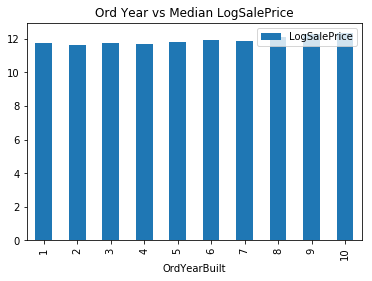

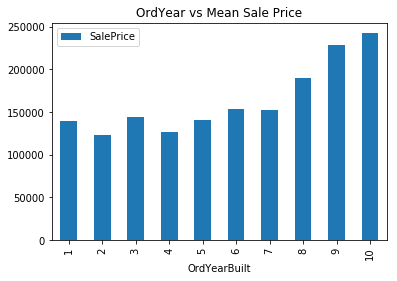

In [274]:
train_df.groupby('OrdYearBuilt').agg('mean').plot(y='LogSalePrice',kind='bar', title = 'Ord Year vs Median LogSalePrice')
train_df.groupby('OrdYearBuilt').agg('mean').plot(y='SalePrice',kind='bar', title = 'OrdYear vs Mean Sale Price')

,SalePrice
OrdYearBuilt,
1,"AxesSubplot(0.125,0.125;0.775x0.755)"
2,"AxesSubplot(0.125,0.125;0.775x0.755)"
3,"AxesSubplot(0.125,0.125;0.775x0.755)"
4,"AxesSubplot(0.125,0.125;0.775x0.755)"
5,"AxesSubplot(0.125,0.125;0.775x0.755)"
6,"AxesSubplot(0.125,0.125;0.775x0.755)"
7,"AxesSubplot(0.125,0.125;0.775x0.755)"
8,"AxesSubplot(0.125,0.125;0.775x0.755)"
9,"AxesSubplot(0.125,0.125;0.775x0.755)"


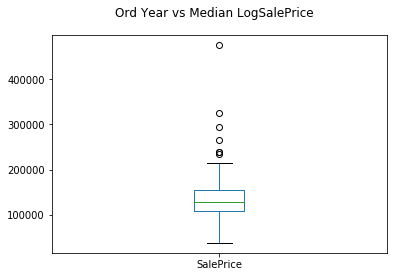

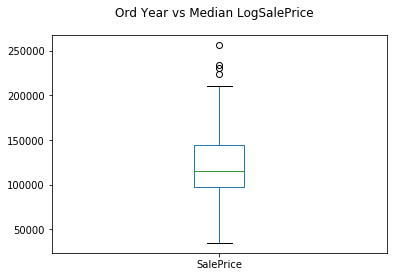

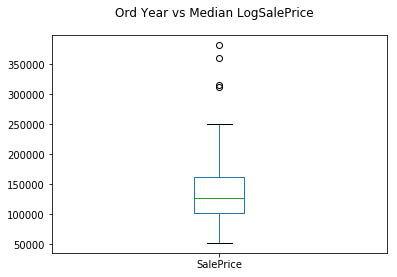

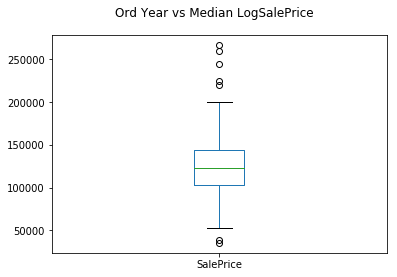

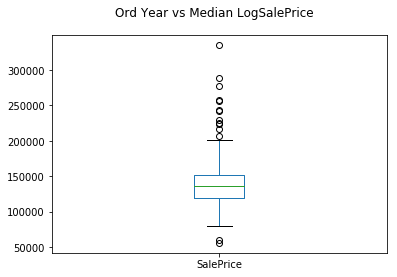

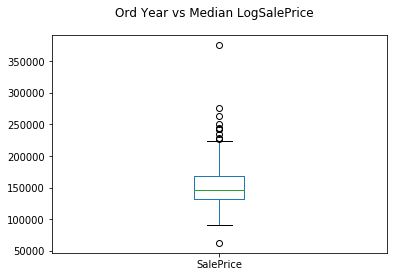

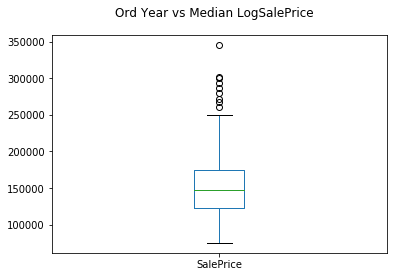

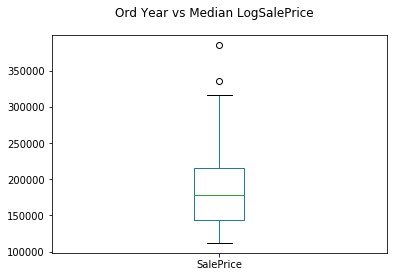

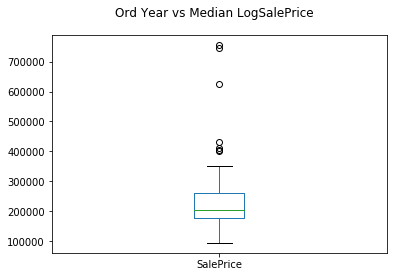

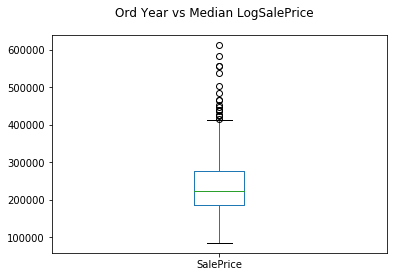

In [285]:
train_df.groupby('OrdYearBuilt').plot(y='SalePrice', x ='OrdYearBuilt',kind='box',subplots=True, title = 'Ord Year vs Median LogSalePrice')

In [306]:
train_df['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

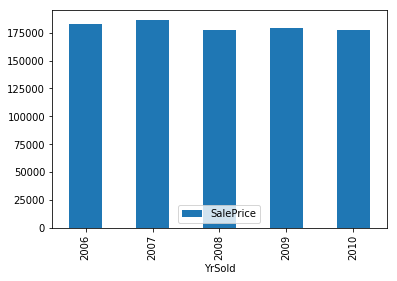

In [312]:
train_df.groupby('YrSold').agg('mean').plot(y='SalePrice',kind='bar') #.plot()

In [333]:
train_df.?

SyntaxError: invalid syntax (<ipython-input-333-974b4b29ca86>, line 1)

In [288]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [329]:
x_train, x_test = train_test_split(train_df)

In [324]:
x_train.shape, x_test.shape

((1095, 82), (365, 82))

In [331]:
#x_train.SalePrice.unique()

In [326]:
y_train = x_train[['SalePrice','LogSalePrice']]

In [327]:
#x_train.loc[:, x_train.columns != 'SalePrice']

x_train = x_train.drop(['LogSalePrice', 'SalePrice','YearBuilt','Utilities','GarageYrBlt','GarageCars',\
              'PoolQC','GarageCond','YrSold','YearRemodAdd'], axis = 1)


In [317]:
rf_model = RandomForestClassifier()

In [328]:
rf_model.fit(x_train,y_train['SalePrice'])

ValueError: could not convert string to float: 'rl'